<a href="https://colab.research.google.com/github/bhavikaradadiya/Bill-Authentication-ML-Project/blob/main/bill_authentication_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Cleaning**

In [ ]:
import pandas as pd
data = pd.read_csv("/content/bill_authentication.csv")
print("First few rows of the dataset:")
print(data.head())
print("\nMissing values in the dataset:")
print(data.isnull().sum())
print("\nChecking for duplicate rows:")
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    data = data.drop_duplicates()
    print(f"Duplicates removed. Dataset now has {len(data)} rows.")
#  Check data types and convert if necessary
print("\nData types of the columns:")
print(data.dtypes)
# Convert to appropriate data types if necessary
data['Class'] = data['Class'].astype('int')  # Ensure 'Class' is an integer


First few rows of the dataset:
   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

Missing values in the dataset:
Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

Checking for duplicate rows:
Number of duplicate rows: 24
Duplicates removed. Dataset now has 1348 rows.

Data types of the columns:
Variance    float64
Skewness    float64
Curtosis    float64
Entropy     float64
Class         int64
dtype: object


**Decision Tree Classification**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
# identify features and target variable
X = data[['Variance', 'Skewness', 'Curtosis', 'Entropy']]  # Independent variables
y = data['Class']  # Target variable
#  Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)
#  Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 98.77%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       221
           1       0.98      0.99      0.99       184

    accuracy                           0.99       405
   macro avg       0.99      0.99      0.99       405
weighted avg       0.99      0.99      0.99       405


Confusion Matrix:
[[218   3]
 [  2 182]]


**K-Means Clustering**

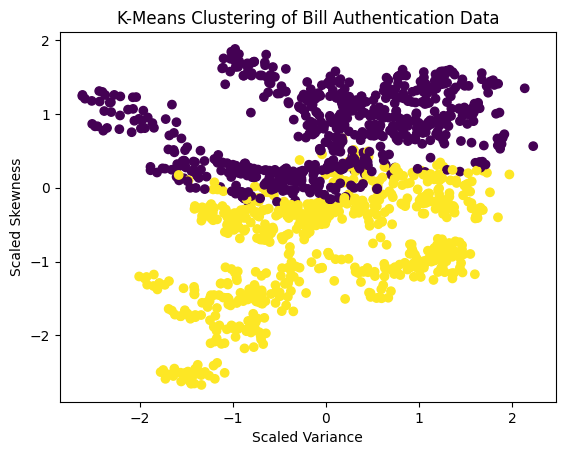

Cluster centroids (in scaled feature space):
[[ 0.04529493  0.7852113  -0.67491589 -0.64900204]
 [-0.04476048 -0.77594627  0.66695228  0.6413442 ]]

Confusion Matrix:
[[330 408]
 [351 259]]
Clustering Accuracy: 43.69%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
X = data[['Variance', 'Skewness', 'Curtosis', 'Entropy']]
# Standardize the data (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=2, random_state=42)  # Since we know there are 2 classes (genuine/counterfeit)
kmeans.fit(X_scaled)
labels = kmeans.labels_
# Add the cluster labels to the original dataset
data['Cluster'] = labels
# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.title('K-Means Clustering of Bill Authentication Data')
plt.xlabel('Scaled Variance')
plt.ylabel('Scaled Skewness')
plt.show()
centroids = kmeans.cluster_centers_
print("Cluster centroids (in scaled feature space):")
print(centroids)
# Evaluate Kmeans algorithm
adjusted_labels = (labels == 0).astype(int)  # If necessary, invert labels depending on output
print("\nConfusion Matrix:")
print(confusion_matrix(data['Class'], adjusted_labels))
accuracy = accuracy_score(data['Class'], adjusted_labels)
print(f"Clustering Accuracy: {accuracy * 100:.2f}%")


**Classification Evaluation (Random Forest)**

Accuracy: 99.01%
Precision: 0.98
Recall: 1.00
F1-Score: 0.99


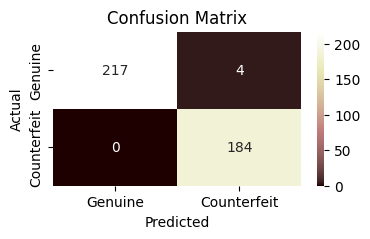

ROC-AUC Score: 1.00


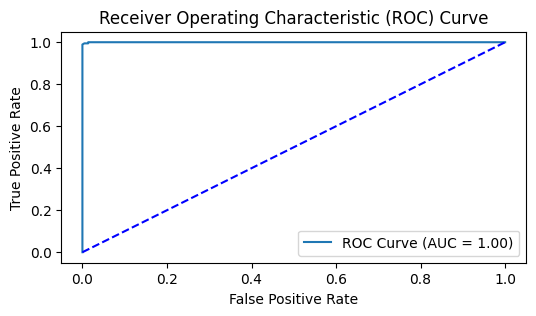

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
#  Train the model and Make predictions on the test set
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]  # For ROC-AUC calculation
# Evaluate the model using various metrics such as accuracy , precision, recall, F1-score,ROC-AUC score, confusion metrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='pink', xticklabels=['Genuine', 'Counterfeit'], yticklabels=['Genuine', 'Counterfeit'])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.2f}")
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,3))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Linear Regression Evaluation**

Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.18
R-squared (R²): 0.88


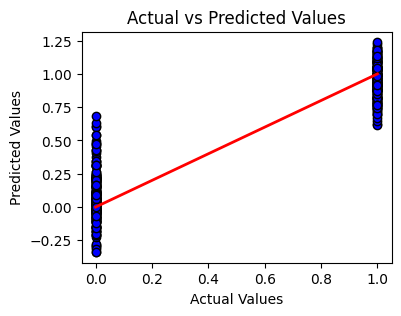

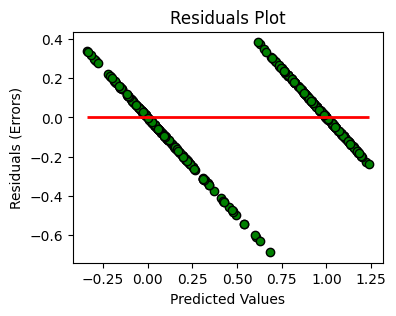

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
#Train a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
#  Make predictions on the test set
y_pred = lr_model.predict(X_test)
# Evaluate the model using mae, mse, rmse, r-squared,
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.2f}")
# Visualize the actual vs. predicted values
plt.figure(figsize=(4, 3))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Perfect prediction line
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
# Visualize the residuals (errors)
residuals = y_test - y_pred
plt.figure(figsize=(4, 3))
plt.scatter(y_pred, residuals, color='green', edgecolor='k')
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='red', linewidth=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Errors)')
plt.show()
